In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')


In [3]:
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# preview the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


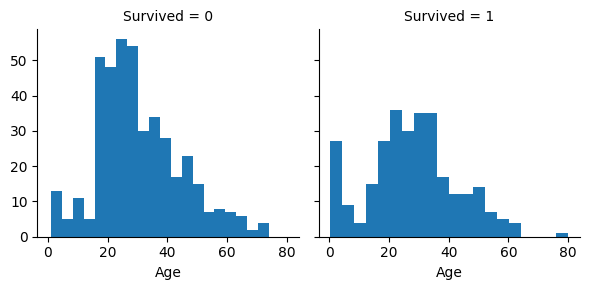

In [13]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [14]:
print("Before", df.shape)

df = df.drop(['Ticket', 'Cabin'], axis=1)

"After", df.shape

Before (891, 12)


('After', (891, 10))

In [15]:
df = df.drop(['Name', 'PassengerId'], axis=1)

df.shape

(891, 8)

In [16]:
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [17]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [18]:
guess_ages = {}

for i in range(0, 2):
    for j in range(0, 3):
        guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j + 1)]['Age'].dropna()
        age_guess = guess_df.median()
        guess_ages[(i, j + 1)] = age_guess

# Apply the imputation to the Age column
for index, row in df.iterrows():
    sex = row['Sex']
    pclass = row['Pclass']
    age = row['Age']
    
    if pd.isnull(age):
        df.at[index, 'Age'] = guess_ages.get((sex, pclass))


df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [19]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [20]:
for index, row in df.iterrows():
    if row['Age'] <= 16:
        df.at[index, 'Age'] = 0
    elif 16 < row['Age'] <= 32:
        df.at[index, 'Age'] = 1
    elif 32 < row['Age'] <= 48:
        df.at[index, 'Age'] = 2
    elif 48 < row['Age'] <= 64:
        df.at[index, 'Age'] = 3
    else:
        df.at[index, 'Age'] = 4  

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,S,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,S,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,S,"(32.252, 48.168]"


In [21]:
df = df.drop(['AgeBand'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,7.2500,S
1,1,1,1,2.0,1,0,71.2833,C
2,1,3,1,1.0,0,0,7.9250,S
3,1,1,1,2.0,1,0,53.1000,S
4,0,3,0,2.0,0,0,8.0500,S


In [22]:
freq_port = df.Embarked.dropna().mode()[0]
freq_port

'S'

In [23]:
freq_port = df['Embarked'].mode()[0]

df['Embarked'] = df['Embarked'].fillna(freq_port)

df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [24]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,7.2500,0
1,1,1,1,2.0,1,0,71.2833,1
2,1,3,1,1.0,0,0,7.9250,0
3,1,1,1,2.0,1,0,53.1000,0
4,0,3,0,2.0,0,0,8.0500,0


In [25]:
df['Fare'].fillna(df['Fare'].dropna().median(), inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,7.2500,0
1,1,1,1,2.0,1,0,71.2833,1
2,1,3,1,1.0,0,0,7.9250,0
3,1,1,1,2.0,1,0,53.1000,0
4,0,3,0,2.0,0,0,8.0500,0


In [26]:
df['FareBand'] = pd.qcut(df['Fare'], 4)
df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [27]:
for index, row in df.iterrows():
    if row['Fare'] <= 7.91:
        df.at[index, 'Fare'] = 0
    elif 7.91 < row['Fare'] <= 14.454:
        df.at[index, 'Fare'] = 1
    elif 14.454 < row['Fare'] <= 31:
        df.at[index, 'Fare'] = 2
    else:
        df.at[index, 'Fare'] = 3

df['Fare'] = df['Fare'].astype(int)
df = df.drop('FareBand', axis=1)

df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,0,0
1,1,1,1,2.0,1,0,3,1
2,1,3,1,1.0,0,0,1,0
3,1,1,1,2.0,1,0,3,0
4,0,3,0,2.0,0,0,1,0
5,0,3,0,1.0,0,0,1,2
6,0,1,0,3.0,0,0,3,0
7,0,3,0,0.0,3,1,2,0
8,1,3,1,1.0,0,2,1,0
9,1,2,1,0.0,1,0,2,1


In [28]:
target = 'Survived'
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.78
Confusion Matrix:
[[75 30]
 [ 9 65]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       105
           1       0.68      0.88      0.77        74

    accuracy                           0.78       179
   macro avg       0.79      0.80      0.78       179
weighted avg       0.81      0.78      0.78       179



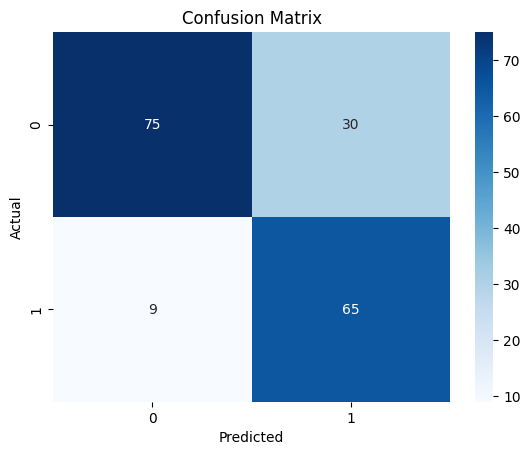

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

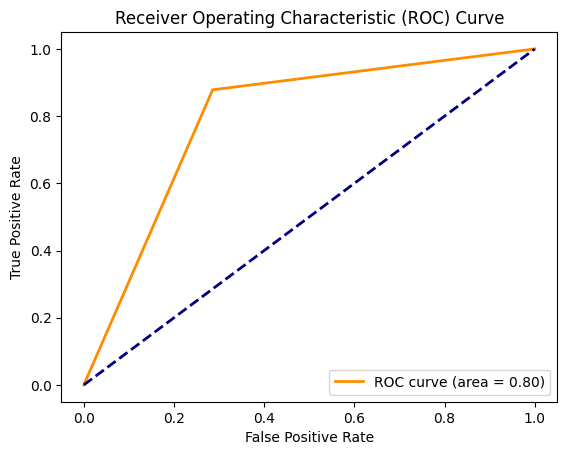

In [31]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

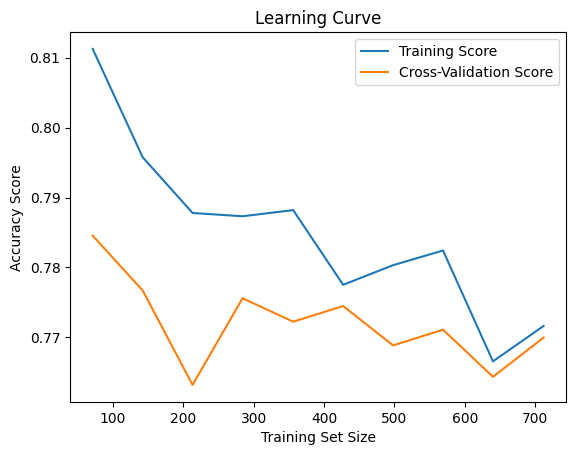

In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(naive_bayes, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

In [33]:
import pickle
with open('/kaggle/working/naive_bayes_model.pkl', 'wb') as model_file:
    pickle.dump(naive_bayes, model_file)
print("Model Saved")

Model Saved
